In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文显示
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 1. 读取数据

In [8]:
# 读取csv 文件并指定数据类型呢
file_path = '../../data/周一所获数据/所有学员的IP使用情况.csv'
df = pd.read_csv(file_path, dtype={'_id': 'string', 'ipCount': 'int'})

# 将 'ips' 字段转换为数组类型 
df['ips'] = df['ips'].apply(lambda x: x.split(','))
# 查看数据, 'ips' 字正常显示为数组类型
df.loc[0, 'ips']
df.shape

(11211, 3)

In [9]:
df.describe()

,ipCount
count,11211.000000
mean,2.113192
std,1.803638
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,50.000000


# 2. 数据清洗
类型转换在读取 csv 文件时已经完成，这里不需要再次转换。
### (1) 单位转换
无需单位转换

### (2) 排序
已有序

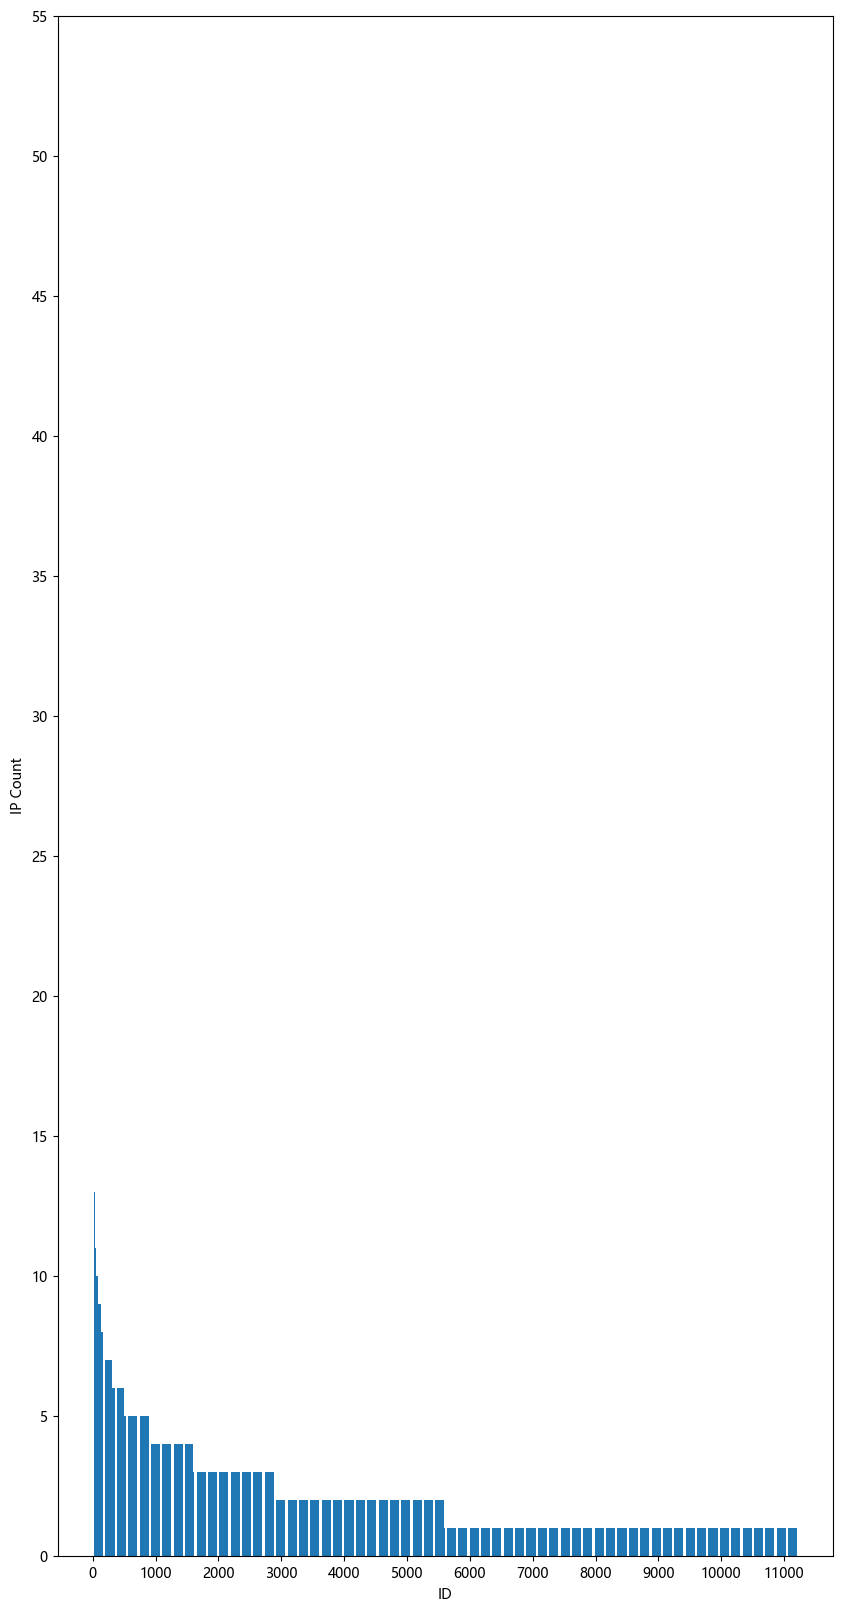

In [10]:
# 要求图表中只有 1 行 1 列子图，并且设置图表的大小为 10 * 10
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 20))

num_elements = 1000
total_rows = df.shape[0]

# 创建索引，这将是条形图的x坐标
x = np.arange(total_rows)
ax.bar(x,
       df['ipCount'].head(total_rows))

# 设置标题
ax.set_xlabel('ID')
ax.set_ylabel('IP Count')

# 每隔 1000 个学员显示一次刻度
ticks = np.arange(0, total_rows, 1000)
labels = [f"{t}" for t in ticks]
plt.xticks(ticks, labels)

# 设置 y 轴刻度精度
plt.yticks(np.arange(0, 60, 5))

plt.savefig('../../imgs/所有学员的 IP 使用情况3-6-all.svg', dpi=8000, bbox_inches='tight', pad_inches=1)
plt.show()

---

# 将数据按 IP 数量分组聚合,绘制直方图

In [11]:
# 统计使用了 x 个 IP 的人数各有多少
df_group = df.groupby('ipCount').agg({'_id': 'count'})
df_group.index.tolist()

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 24,
 25,
 50]

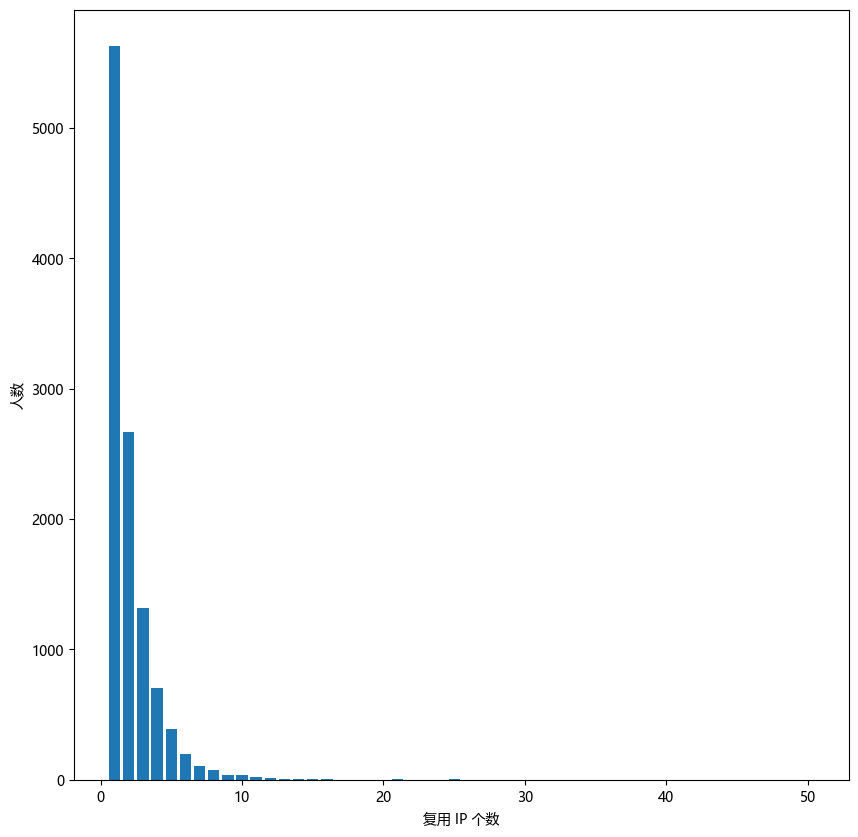

In [13]:
# 要求图表中只有 1 行 1 列子图，并且设置图表的大小为 10 * 10
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))


# 创建索引，这将是条形图的x坐标
ax1.bar(df_group.index.tolist(),
        df_group.iloc[:,0])

# 设置标题
ax1.set_xlabel('复用 IP 个数')
ax1.set_ylabel('人数')

# 设置 y 轴刻度精度
# plt.yticks(np.arange(0, 26, 5))

# plt.savefig('../../imgs/所有学员的 IP 使用情况3-6-all.svg', dpi=8000, bbox_inches='tight', pad_inches=1)
plt.show()